In [ ]:
import json
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving repositories.json to repositories (2).json
Saving users.json to users (2).json


In [ ]:
import os

# List all files in the current directory
print(os.listdir('.'))

['.config', 'sample_data']


In [ ]:
import pandas as pd

# Load the JSON files into DataFrames
repos_df = pd.read_json("/repositories.json")
users_df = pd.read_json("/users.json")

In [ ]:
print(repos_df.columns)

Index(['id', 'user_id', 'name', 'html_url', 'description', 'topics', 'license',
       'language', 'languages', 'created_at', 'updated_at', 'size',
       'stargazers_count', 'watchers_count', 'forks_count',
       'contributors_count', 'commits_count', 'open_issues_count',
       'close_issues_count', 'open_pulls_count', 'close_pulls_count'],
      dtype='object')


In [ ]:
print(users_df.columns)

Index(['login', 'id', 'avatar_url', 'html_url', 'type', 'repositories_count',
       'location', 'followers_count'],
      dtype='object')


## Data Cleaning

### 1. Check for Missing Values

In [ ]:
def summarize_missing_data(df):
    """
    Summarizes the missing data in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame to analyze.

    Returns:
        pd.DataFrame: A DataFrame summarizing missing counts and percentages.
    """
    # Calculate missing counts and percentages
    missing_counts = df.isnull().sum()
    missing_percentage = (missing_counts / len(df)) * 100

    # Combine into a summary DataFrame
    missing_data_summary = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage (%)': missing_percentage
    }).sort_values(by='Missing Count', ascending=False)

    return missing_data_summary

#### repos_df

In [ ]:
# Summarize missing data for repos_df
missing_summary_repos = summarize_missing_data(repos_df)
print("Missing Values in Repositories Data:")
print(missing_summary_repos)

Missing Values in Repositories Data:
                    Missing Count  Missing Percentage (%)
language                      386                9.799441
contributors_count             65                1.650165
description                    17                0.431582
id                              0                0.000000
stargazers_count                0                0.000000
open_pulls_count                0                0.000000
close_issues_count              0                0.000000
open_issues_count               0                0.000000
commits_count                   0                0.000000
forks_count                     0                0.000000
watchers_count                  0                0.000000
updated_at                      0                0.000000
size                            0                0.000000
user_id                         0                0.000000
created_at                      0                0.000000
languages                       0  

In [ ]:
# Handle missing description
repos_df['description'] = repos_df['description'].fillna("No Description")

# Handle missing language
repos_df['language'] = repos_df['language'].fillna("None")

# Handle missing contributors count
repos_df['contributors_count'] = repos_df['contributors_count'].fillna(0)

# Handle missing commits count
repos_df['commits_count'] = repos_df['commits_count'].fillna(0)

1. Description Column
*	Missing Count: 17 missing values.
*	Action: Replace missing descriptions with a placeholder like **"No Description"** to retain all rows.



In [ ]:
print("Missing Values After Cleaning:")
print(repos_df.isnull().sum())

Missing Values After Cleaning:
id                    0
user_id               0
name                  0
html_url              0
description           0
topics                0
license               0
language              0
languages             0
created_at            0
updated_at            0
size                  0
stargazers_count      0
watchers_count        0
forks_count           0
contributors_count    0
commits_count         0
open_issues_count     0
close_issues_count    0
open_pulls_count      0
close_pulls_count     0
dtype: int64


#### users_df

The cleaned users_df:
*	Replaces missing location with "Unknown".
*	Fills missing followers_count with 0.

In [ ]:
# Summarize missing data for users_df
missing_summary_users = summarize_missing_data(users_df)
print("Missing Values in Users Data:")
print(missing_summary_users)

Missing Values in Users Data:
                    Missing Count  Missing Percentage (%)
location                     1439               44.856608
followers_count               274                8.541147
login                           0                0.000000
id                              0                0.000000
avatar_url                      0                0.000000
html_url                        0                0.000000
type                            0                0.000000
repositories_count              0                0.000000


In [ ]:
# Replace missing location with "Unknown"
users_df['location'] = users_df['location'].fillna("Unknown")

# Replace missing followers count with 0
users_df['followers_count'] = users_df['followers_count'].fillna(0)

In [ ]:
print("Missing Values After Cleaning:")
print(repos_df.isnull().sum())

Missing Values After Cleaning:
id                    0
user_id               0
name                  0
html_url              0
description           0
topics                0
license               0
language              0
languages             0
created_at            0
updated_at            0
size                  0
stargazers_count      0
watchers_count        0
forks_count           0
contributors_count    0
commits_count         0
open_issues_count     0
close_issues_count    0
open_pulls_count      0
close_pulls_count     0
dtype: int64


### Validate Data Types

In [ ]:
# Check data types for users_df
print("Users DataFrame Data Types:")
print(users_df.dtypes)

# Check data types for repos_df
print("\nRepositories DataFrame Data Types:")
print(repos_df.dtypes)

Users DataFrame Data Types:
login                  object
id                      int64
avatar_url             object
html_url               object
type                   object
repositories_count      int64
location               object
followers_count       float64
dtype: object

Repositories DataFrame Data Types:
id                                  int64
user_id                             int64
name                               object
html_url                           object
description                        object
topics                             object
license                            object
language                           object
languages                          object
created_at            datetime64[ns, UTC]
updated_at            datetime64[ns, UTC]
size                                int64
stargazers_count                    int64
watchers_count                      int64
forks_count                         int64
contributors_count                float64
commits_co

#### Adjustments for users_df

*	id: Convert to str since it represents a unique identifier.
*	followers_count: Convert from float64 to int64 for numerical consistency.
*	type: Convert to category for memory efficiency.

In [ ]:
# Convert 'id' to string
users_df['id'] = users_df['id'].astype(str)

# Convert 'followers_count' to integer
users_df['followers_count'] = users_df['followers_count'].fillna(0).astype(int)

# Convert 'type' to category
users_df['type'] = users_df['type'].astype('category')

#### Adjustments for repos_df

1.	id and user_id: Convert to str as they represent unique identifiers.
2.	contributors_count and commits_count: Convert from float64 to int64 after filling missing values with 0.
3.	license and language: Ensure they are strings for consistency.
4.	No Changes Needed: Columns such as name, html_url, description, topics, and other numerical columns (size, stargazers_count, etc.) are appropriately typed.

In [ ]:
# Convert 'id' and 'user_id' to string
repos_df['id'] = repos_df['id'].astype(str)
repos_df['user_id'] = repos_df['user_id'].astype(str)

# Convert 'contributors_count' and 'commits_count' to integer
repos_df['contributors_count'] = repos_df['contributors_count'].fillna(0).astype(int)
repos_df['commits_count'] = repos_df['commits_count'].fillna(0).astype(int)

# Ensure 'license' and 'language' are strings
repos_df['license'] = repos_df['license'].astype(str)
repos_df['language'] = repos_df['language'].astype(str)

In [ ]:
# Verify users_df data types
print("Updated Users DataFrame Data Types:")
print(users_df.dtypes)

# Verify repos_df data types
print("\nUpdated Repositories DataFrame Data Types:")
print(repos_df.dtypes)

Updated Users DataFrame Data Types:
login                   object
id                      object
avatar_url              object
html_url                object
type                  category
repositories_count       int64
location                object
followers_count          int64
dtype: object

Updated Repositories DataFrame Data Types:
id                                 object
user_id                            object
name                               object
html_url                           object
description                        object
topics                             object
license                            object
language                           object
languages                          object
created_at            datetime64[ns, UTC]
updated_at            datetime64[ns, UTC]
size                                int64
stargazers_count                    int64
watchers_count                      int64
forks_count                         int64
contributors_count          

### Check for Duplicates

**repos_df** contains one or more columns with **unhashable types (e.g., lists or dictionaries)**

In [ ]:
# Check for duplicates in the dataset
duplicate_count = users_df.duplicated().sum()
print(f"Number of duplicate rows in users_df: {duplicate_count}")

# Remove duplicates if any
users_df = users_df.drop_duplicates()

# Verify duplicates removed
print(f"Number of duplicate rows after cleaning: {users_df.duplicated().sum()}")

Number of duplicate rows in users_df: 0
Number of duplicate rows after cleaning: 0


##### Unhashable types

In [ ]:
# Check which columns contain unhashable types (like lists)
unhashable_columns = repos_df.apply(lambda col: col.map(lambda x: isinstance(x, list)).any())

# Print columns that contain unhashable types
print("Columns with unhashable types:")
print(unhashable_columns[unhashable_columns])

Columns with unhashable types:
topics    True
dtype: bool


In [ ]:
# Check if all rows in 'languages' are empty lists
all_empty = repos_df['languages'].apply(lambda x: isinstance(x, list) and len(x) == 0).all()
print(f"Are all rows in 'languages' empty lists? {all_empty}")

Are all rows in 'languages' empty lists? False


In [ ]:
# Check if all rows in 'language' are empty lists
all_empty = repos_df['language'].apply(lambda x: isinstance(x, list) and len(x) == 0).all()
print(f"Are all rows in 'language' empty lists? {all_empty}")

Are all rows in 'language' empty lists? False


#### Dont Drop the Column asking yuyan

Drop the 'languages' column

In [ ]:
'''# Drop the 'languages' column
repos_df = repos_df.drop(columns=['languages'])
print("'languages' column has been dropped as it contains only empty lists.")

# Check for duplicates in repos_df
print("\nRepositories DataFrame Duplicates:")
print(f"Number of duplicate rows in repos_df: {repos_df.duplicated().sum()}")

# Remove duplicates in repos_df
repos_df = repos_df.drop_duplicates()

# Verify duplicates removed
print(f"Number of duplicate rows in repos_df after cleaning: {repos_df.duplicated().sum()}")'''

'# Drop the \'languages\' column\nrepos_df = repos_df.drop(columns=[\'languages\'])\nprint("\'languages\' column has been dropped as it contains only empty lists.")\n\n# Check for duplicates in repos_df\nprint("\nRepositories DataFrame Duplicates:")\nprint(f"Number of duplicate rows in repos_df: {repos_df.duplicated().sum()}")\n\n# Remove duplicates in repos_df\nrepos_df = repos_df.drop_duplicates()\n\n# Verify duplicates removed\nprint(f"Number of duplicate rows in repos_df after cleaning: {repos_df.duplicated().sum()}")'

### To clean the description column in repos_df

Steps for Cleaning description

1.	Remove Special Characters and Emojis:
	*	Use an LLM or regex-based approach to clean text.
	*	Remove emojis, excessive whitespace, and special symbols that are not part of meaningful text.
2.	Retain Meaningful Content:
	*	Ensure descriptions remain human-readable and informative.
3.	Normalize Text:
	*	Convert text to lowercase for uniformity (optional).
	*	Replace sequences of whitespace with single spaces.

In [ ]:
import re

def clean_description(text):
    """
    Cleans the description by removing special characters, emojis, and excessive whitespace.

    Parameters:
        text (str): The original text.

    Returns:
        str: The cleaned text.
    """
    if not isinstance(text, str):
        return text  # Return non-string inputs as-is

    # Remove emojis using regex pattern
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed characters
        "]+",
        flags=re.UNICODE,
    )
    text = emoji_pattern.sub(r"", text)  # Remove emojis

    # Remove special characters
    text = re.sub(r"[^A-Za-z0-9\s.,!?'-]", "", text)

    # Normalize whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text

In [ ]:
# Show 20 samples before cleaning
print("20 Samples Before Cleaning:")
print(repos_df['description'].head(20))

# Apply the cleaning function to the 'description' column
repos_df['description'] = repos_df['description'].apply(clean_description)

# Show 20 samples after cleaning
print("\n20 Samples After Cleaning:")
print(repos_df['description'].head(20))

20 Samples Before Cleaning:
0     freeCodeCamp.org's open-source codebase and cu...
1            :books: Freely available programming books
2     😎 Awesome lists about all kinds of interesting...
3                        A collective list of free APIs
4     Master programming by recreating your favorite...
5     A complete computer science study plan to beco...
6     Interactive roadmaps, guides and other educati...
7     Learn how to design large-scale systems. Prep ...
8     Repo for counting stars and contributing. Pres...
9       The library for web and native user interfaces.
10    An opinionated list of awesome Python framewor...
11    This is the repo for Vue 2. For Vue 3, go to h...
12              Curated list of project-based tutorials
13    A list of Free Software network services and w...
14                 All Algorithms implemented in Python
15    📝 Algorithms and data structures implemented i...
16    An Open Source Machine Learning Framework for ...
17                  


**Before Cleaning:**
😎 Awesome lists about all kinds of interesting topics
Master programming by recreating your favorite technologies. 👨‍💻 🛠️
A collective list of free APIs. 🤖

**After Cleaning:**
Awesome lists about all kinds of interesting topics
Master programming by recreating your favorite technologies
A collective list of free APIs

### Visualisation

#### 1. Language Popularity

Plot: Bar Chart

*	What to Show: The most commonly used programming languages in the repositories.
*	Why: Helps identify trends in programming language usage.

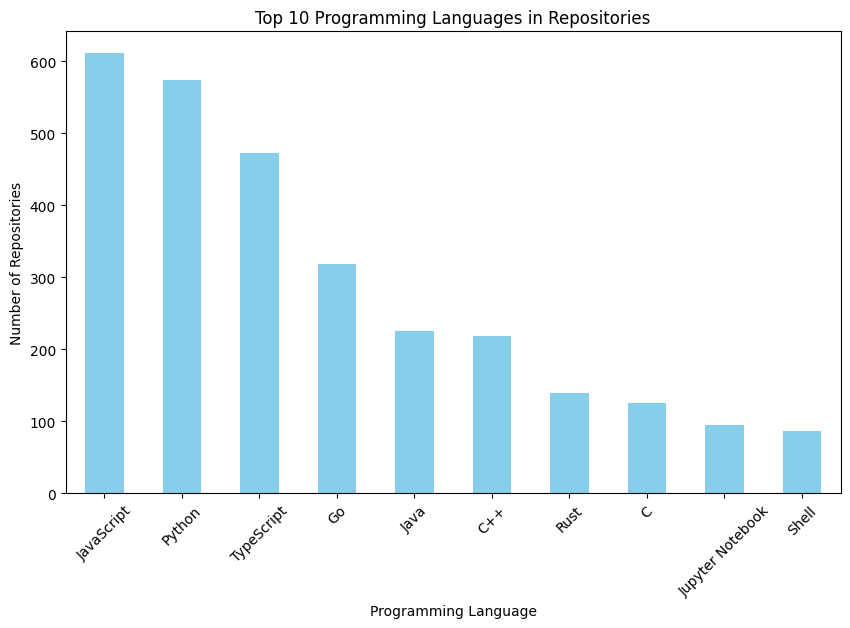

In [ ]:
import matplotlib.pyplot as plt

language_counts = repos_df['language'].value_counts()
plt.figure(figsize=(10, 6))
language_counts[:10].plot(kind='bar', color='skyblue')
plt.title("Top 10 Programming Languages in Repositories")
plt.xlabel("Programming Language")
plt.ylabel("Number of Repositories")
plt.xticks(rotation=45)
plt.show()

#### 2. Repositories by Star Count

Plot: Log-Scale Histogram

*	What to Show: Distribution of repositories by star count on a logarithmic scale.
*	Why: Highlights the most popular repositories while accounting for outliers.

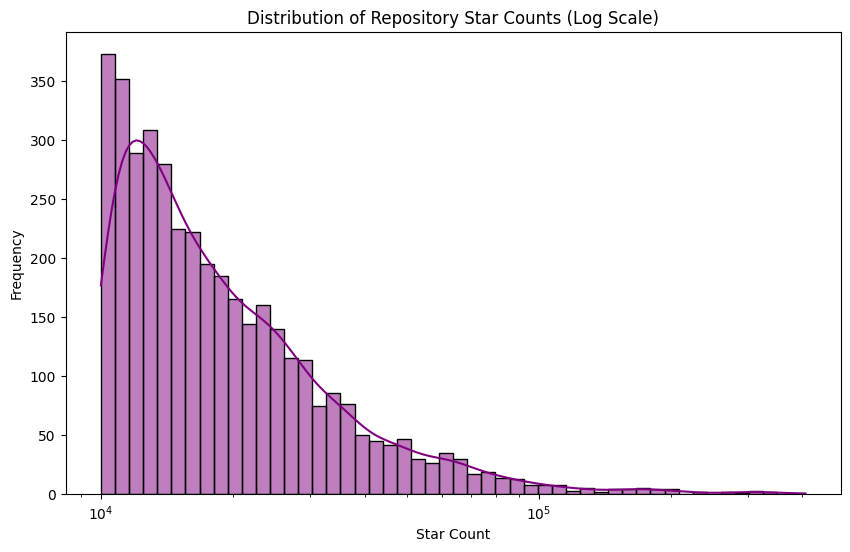

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(repos_df['stargazers_count'], bins=50, kde=True, log_scale=(True, False), color='purple')
plt.title("Distribution of Repository Star Counts (Log Scale)")
plt.xlabel("Star Count")
plt.ylabel("Frequency")
plt.show()

#### 3. User Type Proportion

Plot: Pie Chart

*	What to Show: Distribution of users by type (e.g., User vs. Organization).
*	Why: Illustrates how individuals and organizations contribute to the repositories.

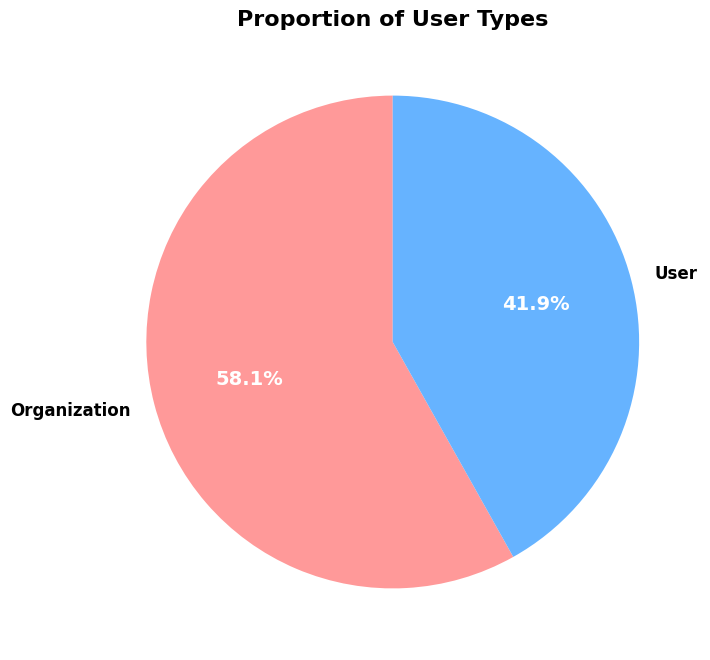

In [ ]:

# Plot the pie chart with improved aesthetics
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    user_type_counts,
    labels=user_type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff', '#99ff99'],
    textprops={'fontsize': 12, 'weight': 'bold'}
)

# Improve readability of percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_size(14)

# Add a title
plt.title("Proportion of User Types", fontsize=16, fontweight='bold')
plt.show()

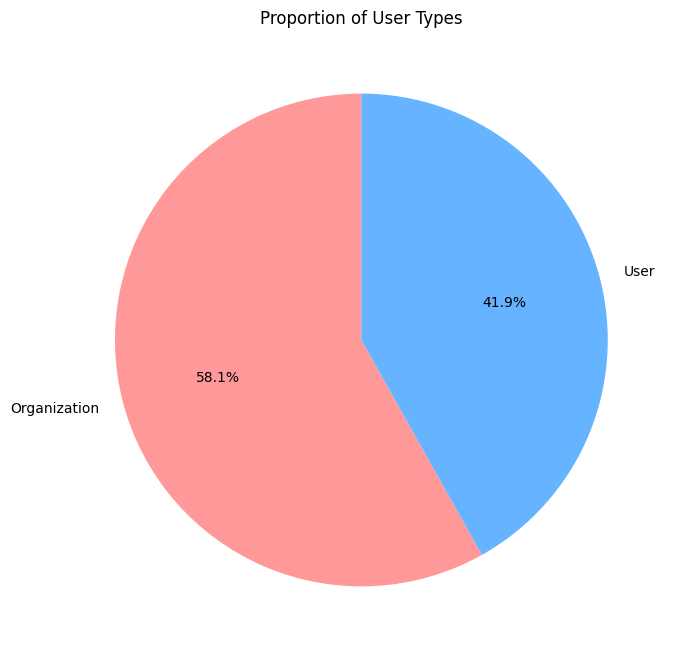

In [ ]:
user_type_counts = users_df['type'].value_counts()
plt.figure(figsize=(8, 8))
user_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Proportion of User Types")
plt.ylabel("")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### 4. User Locations

Code: User Locations Without Unknown

Plot: Bar Chart (Top 10 Locations)

*	What to Show: Top 10 most common user locations.
*	Why: Highlights where most developers or organizations are located.

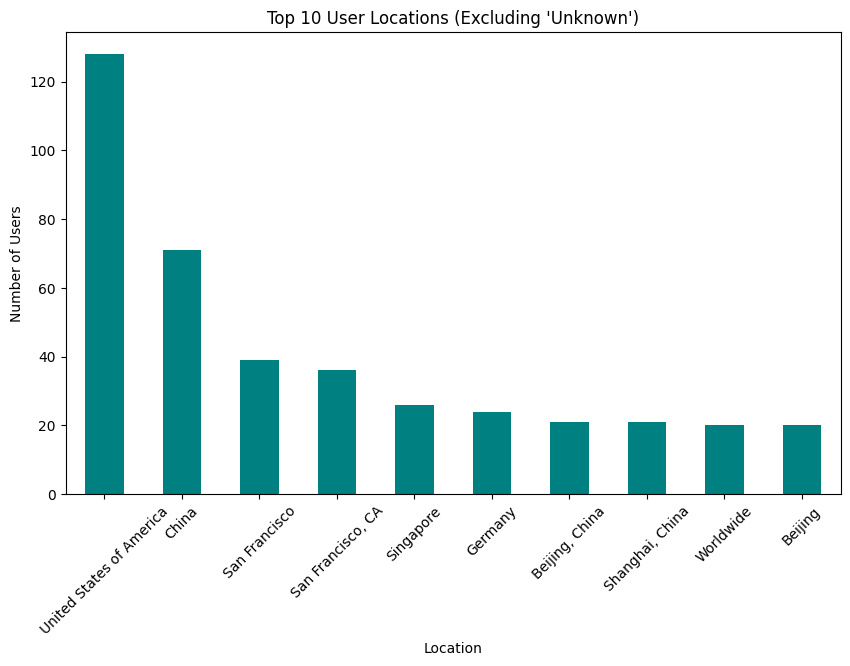

In [ ]:
import matplotlib.pyplot as plt

# Filter out "Unknown" locations
filtered_locations = users_df[users_df['location'] != "Unknown"]

# Count the top 10 locations
location_counts = filtered_locations['location'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='teal')
plt.title("Top 10 User Locations (Excluding 'Unknown')")
plt.xlabel("Location")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

<ipython-input-66-3640a09956e1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_locations['Country'] = filtered_locations['location'].apply(map_to_country)


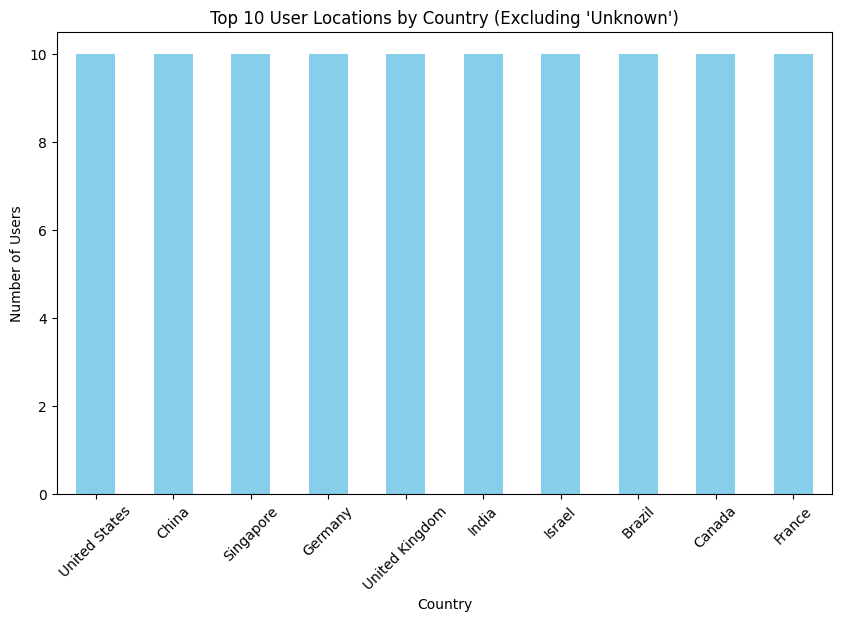

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pycountry import countries

# Function to map location names to countries
def map_to_country(location):
    try:
        # Geocode location to find corresponding country
        return countries.lookup(location).name
    except LookupError:
        return None

# Filter out "Unknown" locations
filtered_locations = users_df[users_df['location'] != "Unknown"]

# Map each location to its country
filtered_locations['Country'] = filtered_locations['location'].apply(map_to_country)

# Drop rows where country mapping failed
filtered_locations = filtered_locations.dropna(subset=['Country'])

# Aggregate user counts by country
country_counts = filtered_locations['Country'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='#87CEEB')  # Light blue color
plt.title("Top 10 User Locations by Country (Excluding 'Unknown')")
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

<ipython-input-96-70349447f0ba>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_locations['Country'] = filtered_locations['location'].apply(map_to_country)


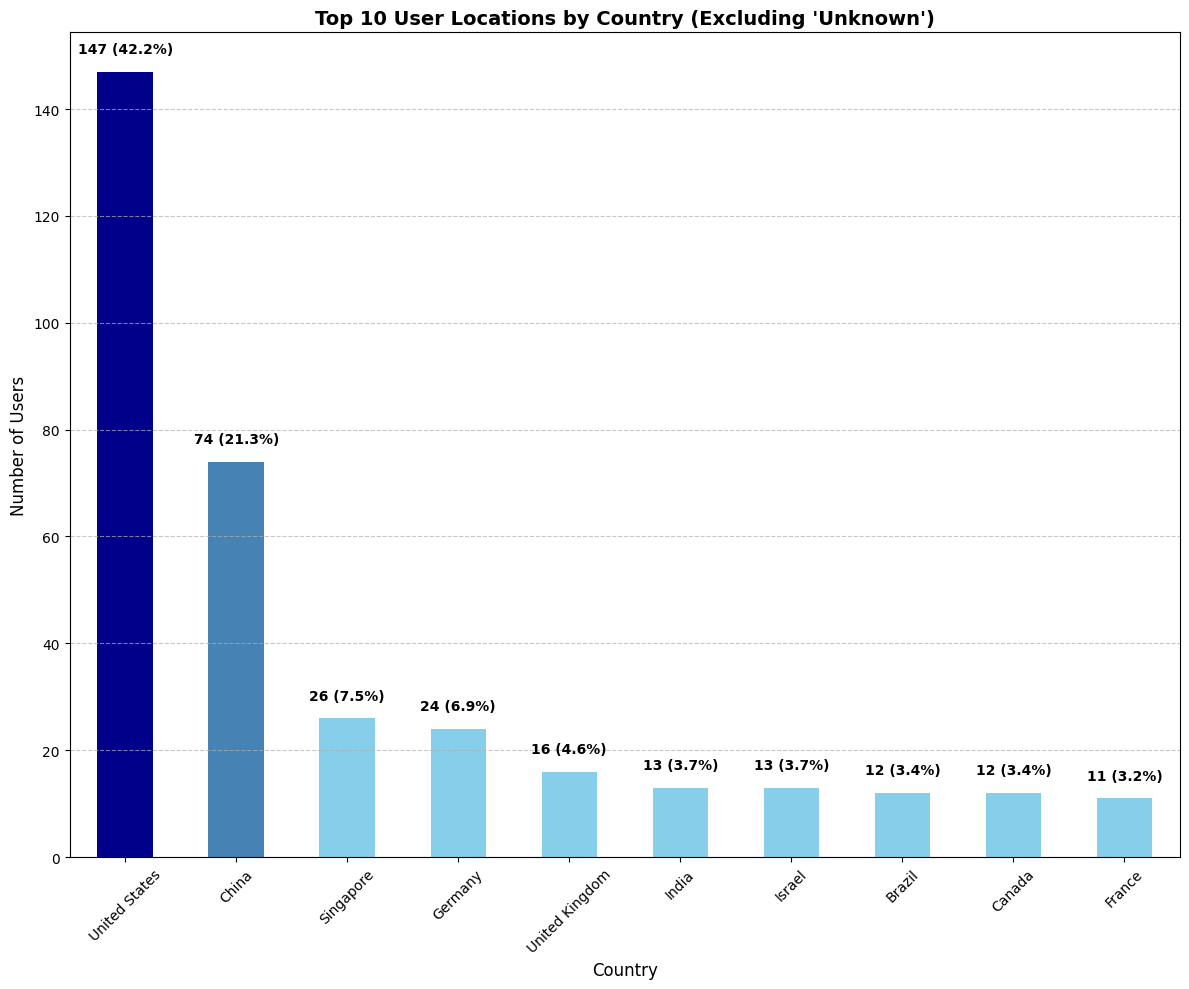

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pycountry import countries

# Function to map location names to countries
def map_to_country(location):
    try:
        # Geocode location to find corresponding country
        return countries.lookup(location).name
    except LookupError:
        return None

# Filter out "Unknown" locations
filtered_locations = users_df[users_df['location'] != "Unknown"]

# Map each location to its country
filtered_locations['Country'] = filtered_locations['location'].apply(map_to_country)

# Drop rows where country mapping failed
filtered_locations = filtered_locations.dropna(subset=['Country'])

# Aggregate user counts by country
country_counts = filtered_locations['Country'].value_counts().head(10)

# Define a color gradient for the bars
colors = ['#00008B', '#4682B4'] + ['#87CEEB'] * (len(country_counts) - 2)  # Dark blue, slightly lighter, and light blue

# Total number of users in the filtered dataset
total_users = country_counts.sum()

# Plot the bar chart with gradient colors
plt.figure(figsize=(12, 10))
ax = country_counts.plot(kind='bar', color=colors)

# Add text labels for numbers and percentages
for i, count in enumerate(country_counts):
    percentage = (count / total_users) * 100
    ax.text(i, count + total_users * 0.01, f'{count} ({percentage:.1f}%)',
            ha='center', fontsize=10, color='black', fontweight='bold')

# Add title and labels
plt.title("Top 10 User Locations by Country (Excluding 'Unknown')", fontsize=14, fontweight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-65-40c305a70939>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_locations['Country'] = filtered_locations['location'].apply(map_to_country)


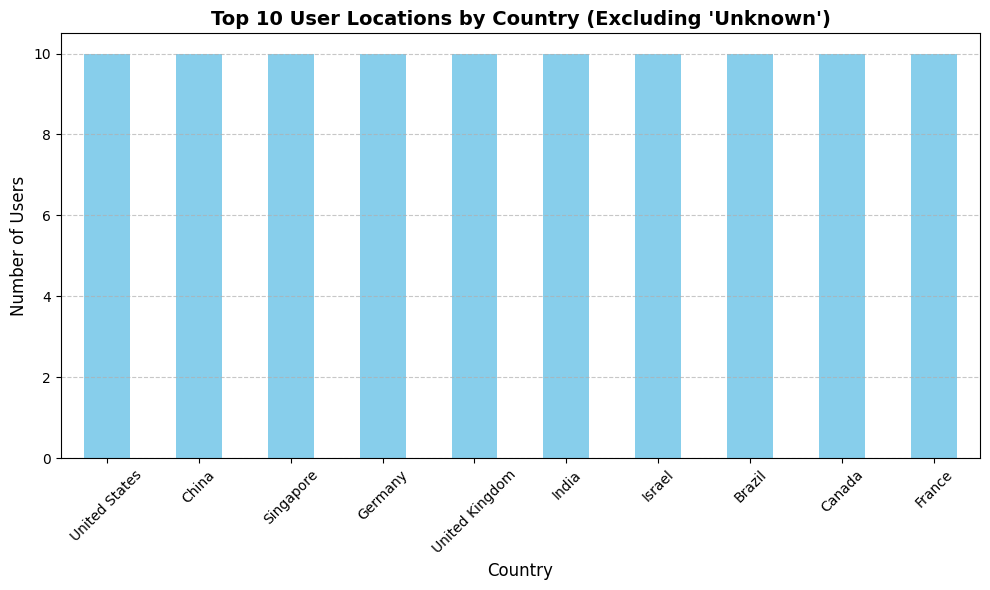

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to map location names to countries
def map_to_country(location):
    try:
        # Geocode location to find corresponding country
        return countries.lookup(location).name
    except LookupError:
        return None

# Filter out "Unknown" locations
filtered_locations = users_df[users_df['location'] != "Unknown"]

# Map each location to its country
filtered_locations['Country'] = filtered_locations['location'].apply(map_to_country)

# Drop rows where country mapping failed
filtered_locations = filtered_locations.dropna(subset=['Country'])

# Aggregate user counts by country
country_counts = filtered_locations['Country'].value_counts().head(10)

# Plot the bar chart with light blue and improved aesthetics
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='#87CEEB')  # Light blue color
plt.title("Top 10 User Locations by Country (Excluding 'Unknown')", fontsize=14, fontweight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
!pip install pycountry

<ipython-input-155-848d8d5a97a9>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



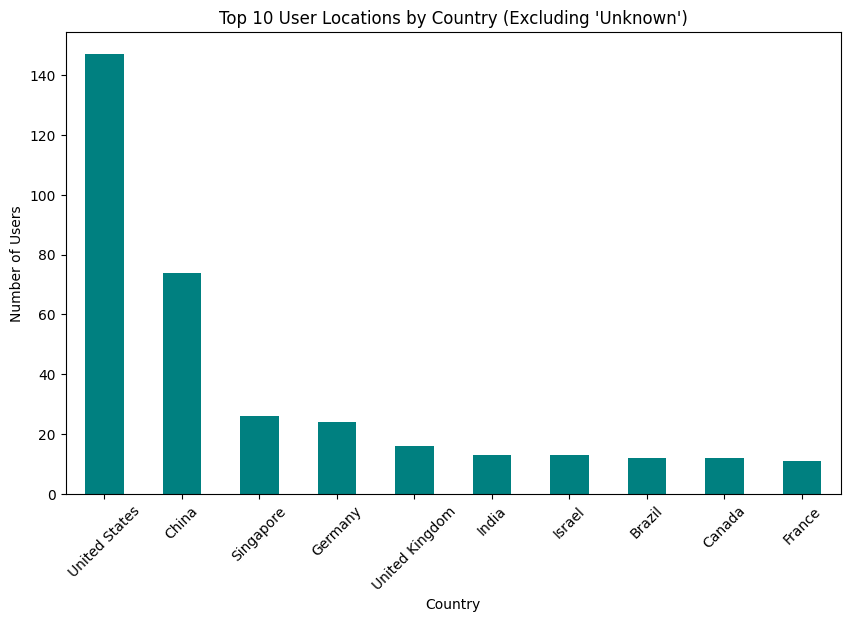

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pycountry import countries

# Function to map location names to countries
def map_to_country(location):
    try:
        # Geocode location to find corresponding country
        return countries.lookup(location).name
    except LookupError:
        return None

# Filter out "Unknown" locations
filtered_locations = users_df[users_df['location'] != "Unknown"]

# Map each location to its country
filtered_locations['Country'] = filtered_locations['location'].apply(map_to_country)

# Drop rows where country mapping failed
filtered_locations = filtered_locations.dropna(subset=['Country'])

# Aggregate user counts by country
country_counts = filtered_locations['Country'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='teal')
plt.title("Top 10 User Locations by Country (Excluding 'Unknown')")
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
from pycountry import countries

# Standardize country names
def standardize_country_name(name):
    try:
        return countries.lookup(name).name
    except LookupError:
        return None

# Filter out "Unknown" locations and standardize country names
filtered_locations = users_df[users_df['location'] != "Unknown"]
location_counts = filtered_locations['location'].value_counts().reset_index()
location_counts.columns = ['Country', 'User Count']
location_counts['Country'] = location_counts['Country'].apply(standardize_country_name)
location_counts = location_counts.dropna()  # Remove invalid country names

# Determine the maximum and minimum user count
max_count = location_counts['User Count'].max()
min_count = location_counts['User Count'].min()

import pandas as pd
import plotly.express as px
from pycountry import countries

# Aggregate user counts by country to sum duplicates
location_counts = location_counts.groupby('Country', as_index=False)['User Count'].sum()

# Replace 0 counts with None for white color representation
location_counts['User Count for Map'] = location_counts['User Count'].replace(0, None)

# Create the choropleth map with a single-color scale
fig = px.choropleth(
    location_counts,
    locations="Country",
    locationmode="country names",  # Match country names
    color="User Count for Map",  # Use adjusted column
    color_continuous_scale="Blues",  # Single-color scale (shades of blue)
    title="User Locations on World Map",
    labels={'User Count for Map': 'Number of Users'}
)

# Update map layout
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    coloraxis_colorbar=dict(
        title="Number of Users",
        ticks="outside"
    )
)

# Show the map
fig.show()

#### 5. Repository Size Distribution
*	What to Show: Distribution of repository sizes in KB (with outliers).
* Why: Visualizes size variations across repositories.

the plot for repository size distribution, you can:
1.	Use a Log Scale for Size: Since the data likely has a few very large outliers, using a log scale will make the plot more interpretable.
2.	Remove Extreme Outliers: Remove sizes beyond a certain percentile (e.g., 99th) to focus on the bulk of the data.
3.	Add Labels and Grid: Enhance readability with proper labels and grid lines.

<ipython-input-161-74271ce4a759>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



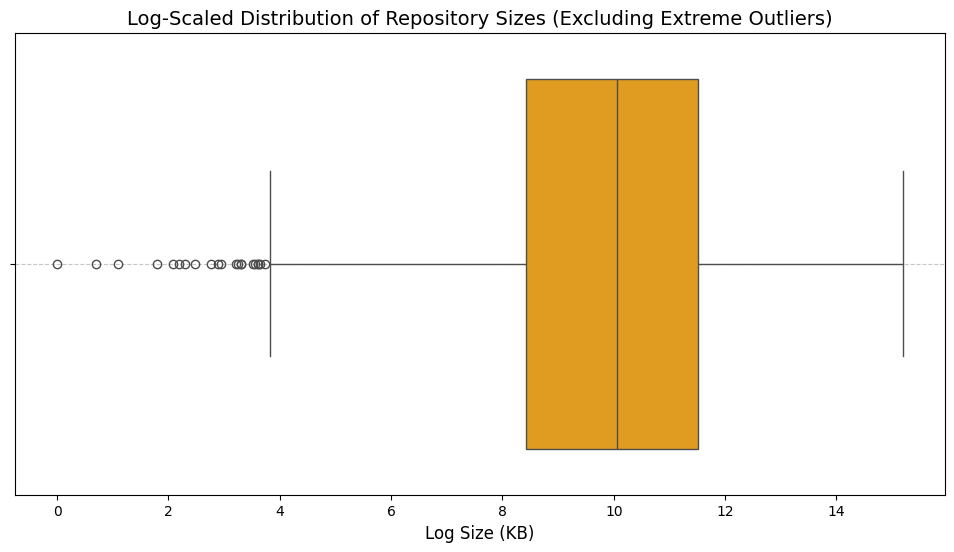

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Remove extreme outliers (e.g., above the 99th percentile)
threshold = np.percentile(repos_df['size'], 99)
filtered_sizes = repos_df[repos_df['size'] <= threshold]

# Apply log transformation to handle scale differences
filtered_sizes['log_size'] = np.log1p(filtered_sizes['size'])  # Log(1+x) to avoid log(0)

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_sizes['log_size'], color='orange')
plt.title("Log-Scaled Distribution of Repository Sizes (Excluding Extreme Outliers)", fontsize=14)
plt.xlabel("Log Size (KB)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid
plt.show()

This boxplot serves as a snapshot of repository sizes in the ecosystem:
*	Most repositories are small and follow conventional practices.
*	A few unusually large repositories highlight the need for special considerations in workflows and tooling.
*	Log scaling reveals the diversity of repository sizes, making it easier to see trends across both typical and atypical projects.

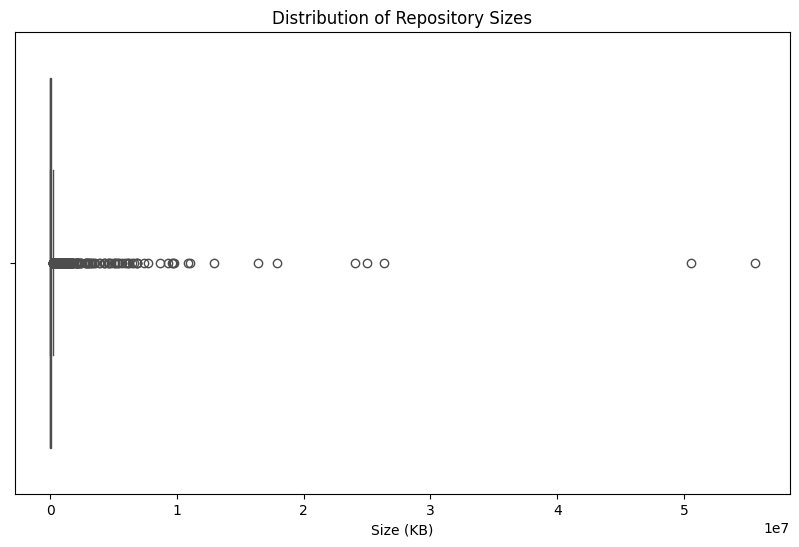

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=repos_df['size'], color='orange')
plt.title("Distribution of Repository Sizes")
plt.xlabel("Size (KB)")
plt.show()

#### 6. Top Starred Repositories

Plot: Horizontal Bar Chart

*	What to Show: Names of the top 10 repositories by star count.
*	Why: Highlights the most popular projects.


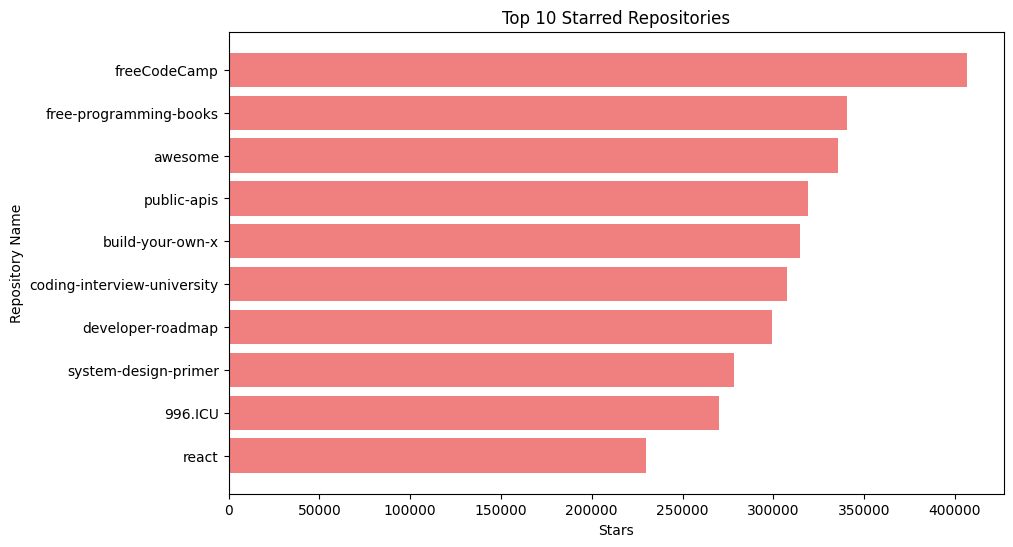

In [ ]:
top_repos = repos_df.nlargest(10, 'stargazers_count')[['name', 'stargazers_count']]
plt.figure(figsize=(10, 6))
plt.barh(top_repos['name'], top_repos['stargazers_count'], color='lightcoral')
plt.title("Top 10 Starred Repositories")
plt.xlabel("Stars")
plt.ylabel("Repository Name")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

#### 7. Followers Distribution

Plot: Cumulative Distribution Function (CDF)

*	What to Show: Cumulative distribution of followers for users.
*	Why: Demonstrates the proportion of users with fewer or more followers.

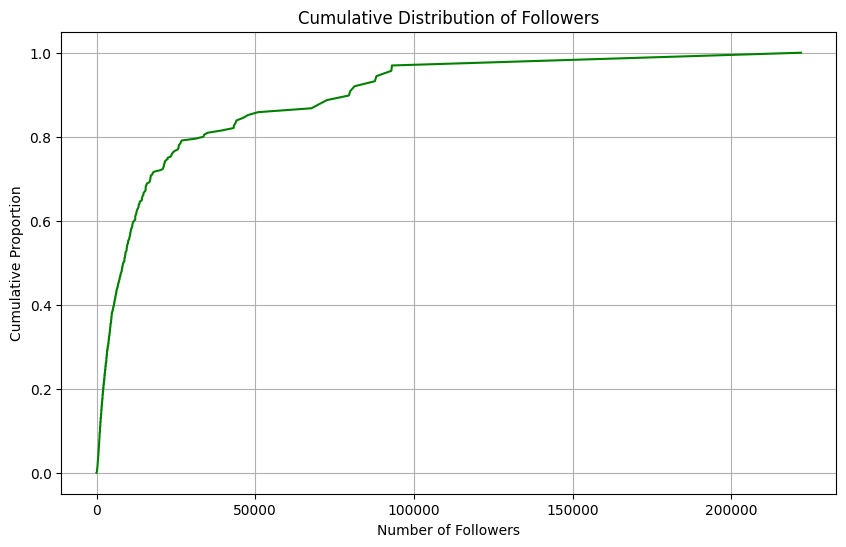

In [ ]:
sorted_followers = users_df['followers_count'].sort_values()
cdf = sorted_followers.cumsum() / sorted_followers.sum()
plt.figure(figsize=(10, 6))
plt.plot(sorted_followers, cdf, color='green')
plt.title("Cumulative Distribution of Followers")
plt.xlabel("Number of Followers")
plt.ylabel("Cumulative Proportion")
plt.grid()
plt.show()

#### 8. Relationships Between Metrics
Plot: Pair Plot

*	What to Show: Pairwise relationships between key metrics like stargazers_count, forks_count, and size.
*	Why: Visualizes correlations between important variables.

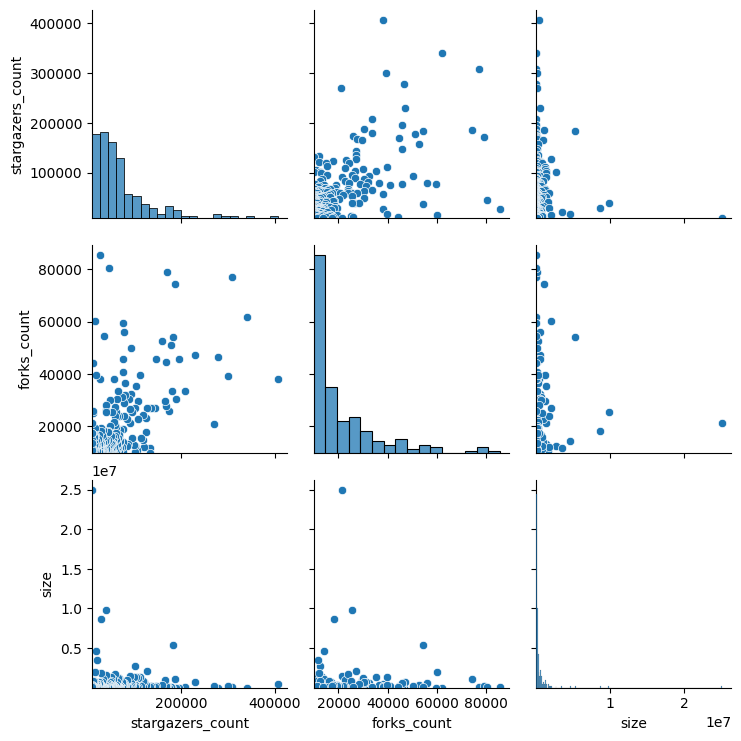

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter metrics to only include values greater than 10,000
filtered_metrics = metrics[(metrics['stargazers_count'] > 10000) &
                           (metrics['forks_count'] > 10000) &
                           (metrics['size'] > 10000)]

# Create the pairplot
pairplot = sns.pairplot(filtered_metrics)

# Adjust axes for each subplot
for ax in pairplot.axes.flat:
    ax.set_xlim(10000, None)
    ax.set_ylim(10000, None)

# Set axis labels for each subplot (for the leftmost column and bottom row)
for i in range(len(pairplot.axes)):
    for j in range(len(pairplot.axes)):
        if i == len(pairplot.axes) - 1:  # Label the x-axis for the bottom row
            pairplot.axes[i, j].set_xlabel(pairplot.axes[i, j].get_xlabel(), fontsize=10)
        if j == 0:  # Label the y-axis for the left column
            pairplot.axes[i, j].set_ylabel(pairplot.axes[i, j].get_ylabel(), fontsize=10)

# Show the plot
plt.show()

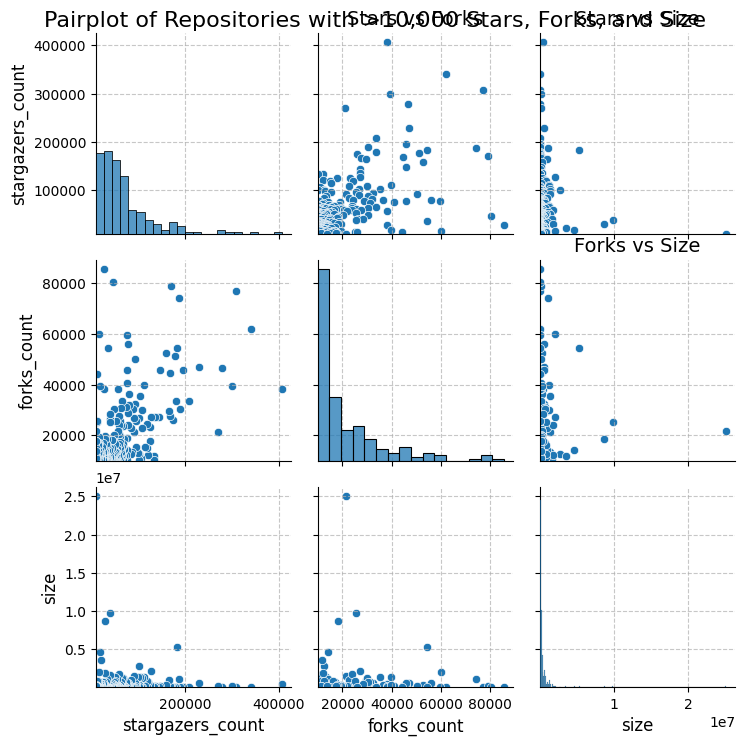

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter metrics to only include values greater than 10,000
filtered_metrics = metrics[(metrics['stargazers_count'] > 10000) &
                           (metrics['forks_count'] > 10000) &
                           (metrics['size'] > 10000)]

# Create the pairplot
pairplot = sns.pairplot(filtered_metrics)

# Adjust axes for each subplot
for ax in pairplot.axes.flat:
    ax.set_xlim(10000, None)
    ax.set_ylim(10000, None)
    ax.grid(True, linestyle='--', alpha=0.7)  # Add grid lines for better readability

# Set axis labels for each subplot (for the leftmost column and bottom row)
for i in range(len(pairplot.axes)):
    for j in range(len(pairplot.axes)):
        if i == len(pairplot.axes) - 1:  # Label the x-axis for the bottom row
            pairplot.axes[i, j].set_xlabel(pairplot.axes[i, j].get_xlabel(), fontsize=12)
        if j == 0:  # Label the y-axis for the left column
            pairplot.axes[i, j].set_ylabel(pairplot.axes[i, j].get_ylabel(), fontsize=12)

# Add titles to each plot to clarify relationships
pairplot.axes[0, 1].set_title('Stars vs Forks', fontsize=14)
pairplot.axes[0, 2].set_title('Stars vs Size', fontsize=14)
pairplot.axes[1, 2].set_title('Forks vs Size', fontsize=14)

# Add overall title to the plot
plt.subplots_adjust(top=0.95)  # Adjust the plot to make space for the title
pairplot.fig.suptitle('Pairplot of Repositories with >10,000 Stars, Forks, and Size', fontsize=16)

# Show the plot
plt.show()